# Iris Classification 

<span style="color:black">
<h2> Names: Emma Franzblau and Ellen Burrell </h2>
</span>

# Abstract 

In our classification set, we analyze two factors of an iris in order to classify the specific species of iris. The two factors we analyze are sepal length in centimeters and petal length in cm from a dataset of 150 iris samples. The data set contains 3 classes of 50 instances each, and each classification pertains to a species of iris plant. One of our areas of focus is the sepal of the iris, which is the part of the flower’s angiosperm. Based on our tables in the section entitled EDA, the model of this data is clean and easy to follow. When running initial classification on the Iris-setosa class we found that Iris-setosa is the most distinct, being linearly separable from the other two classes. In our secondary classification on the subset of data excluding Iris-setosa we found that the classes of Iris-versicolor and Iris-virginica are not entirely separable, however, Iris-versicolor is more concentrated to the smaller values of sepal length. 

# Introduction 

The primary goal of this classification is to determine the kind of iris, of the three classes, based on the two parameters chosen, sepal length and petal length in centimeters. We are asking the question of whether solely sepal and petal length can be used to accurately predict which of the three classes of iris a plant will fall under. The purpose behind this project is one of classification in many senses, firstly the data show a strong example of classification and help the reader to understand the process itself, secondly the purpose is to show that classification, in this case, can prove accurate on a two dimensional scale. In order to understand this topic, limited background is needed. One helpful term to understand is that of sepal, a sepal is the part of a flower that is leafy and green in appearance and function to enclose and protect a flower as it grows. The dataset chosen for this is the iris dataset created by R.A. Fisher in 1936 because it demonstrates patterns clearly and even linearly to bring a broader more thorough understanding to the study of classification and the nearest neighbor approach. By diving deep into clear datasets we cannot only learn more about the topic itself but also further grasp the processes of classification used to derive and draw conclusions from these patterns.

In [1]:
import numpy as np
from datascience import *

# These lines set up graphing capabilities.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

def standard_units(x):
    return (x - np.mean(x))/np.std(x)

def make_grid(min_, max_, step):
    x_array = make_array()
    y_array = make_array()
    for x in np.arange(min_, max_, step):
        for y in np.arange(min_, max_, step):
            x_array = np.append(x_array, x)
            y_array = np.append(y_array, y)
    return x_array, y_array

def distance_nn(point1, point2):
    """The distance between two arrays of numbers."""
    return np.sqrt(np.sum((point1 - point2)**2))

def all_distances(training, point):
    """The distance between p (an array of numbers) and the numbers in row i of attribute_table."""
    attributes = training.drop('Class')
    def distance_from_point(row):
        return distance_nn(point, np.array(row))
    return attributes.apply(distance_from_point)

def table_with_distances(training, point):
    """A copy of the training table with the distance from each row to array p."""
    return training.with_column('Distance', all_distances(training, point))

def closest(training, point, k):
    """A table containing the k closest rows in the training table to array p."""
    with_dists = table_with_distances(training, point)
    sorted_by_distance = with_dists.sort('Distance')
    topk = sorted_by_distance.take(np.arange(k))
    return topk

def majority(topkclasses):
    """1 if the majority of the "Class" column is 1s, and 0 otherwise."""
    ones = topkclasses.where('Class', are.equal_to(1)).num_rows
    zeros = topkclasses.where('Class', are.equal_to(0)).num_rows
    if ones > zeros:
        return 1
    else:
        return 0

def classify(training, p, k):
    """Classify an example with attributes p using k-nearest neighbor classification with the given training table."""
    closestk = closest(training, p, k)
    topkclasses = closestk.select('Class')
    return majority(topkclasses)

def classify_table(training, points, k):
    """Classify a table of unlabled points using KNN"""
    def classify_p(p):
        return classify(training, p, k)

    classes = points.apply(classify_p)
    return points.with_column('Class', classes)

def draw_nearest_neighbor(table, point):
    with_distances = table_with_distances(table, point)
    distances_sorted = with_distances.sort('Distance', descending=False)

    t = distances_sorted.drop('Distance')

    x_closest = t.row(0).item(0)
    y_closest = t.row(0).item(1)

    table.scatter(table.labels[0], table.labels[1], group='Class')
    plt.scatter(point.item(0), point.item(1), color='red', s=30)
    plt.plot(make_array(point.item(0), x_closest), make_array(point.item(1), y_closest), color='k', lw=2);

# Data and EDA


## Data Source and Ethics



In [2]:
#Loading the data 
iris_data = Table().read_table("iris.data.csv")
#References< (https://archive.ics.uci.edu/ml/datasets/Iris) > the data came from this website.

## Ethical Considerations
Ethical considerations are not of a primary concern with this dataset due to the represented attributes being numeric measurements of flowers. There is, therefore, not a concern of underrepresentation such as in more complex studies of humans or other animals where more factors are at play. The methods of collection and use of this dataset also help to demonstrate the lack of an ethical concern surrounding this data. The data was collected on the same day, by the same man, with the same tools, leading to a representative method of data gathering. This data set and its contribution to the field of statistics were made famous by R.A. Fisher and continue to be relevant in the teaching and learning of students in many fields.

## Relevant Attributes

There are 5 variables in our data set, “Sepal length in cm”, “Sepal width in cm”, “Petal length in cm”, “Petal width in cm” and the “Species”. When converting our data set into a csv file, the column labels took the places of our first row- '5.1', '3.5', '1.4', '0.2', 'Iris-setosa'. We then relabeled the column names with our 5 variables, effectively losing one row of data. The selected classification is Species because it highlights the class of the iris. When running the first classification set the value 1 refers to Iris-Setosa while the value 0 refers to the lack of Iris-setosa, so Iris-virginica or Iris-versicolor. In the second classification distinguishing between the latter two species, Iris-virginica and Iris-versicolor, the values 1 and 0 are applied respectively to the two classes. 

## EDA 

### In this section, we are showing the steps for our early data analysis.


**1.Here we are are loading the data and relabeling the columns that loaded improperly when we loaded the CVS file.**

In [3]:
iris_data = Table().read_table("iris.data.csv")
iris_data
new_data = iris_data.relabel('5.1', 'sepal length in cm')
new_data = iris_data.relabel('3.5', 'sepal width in cm')
new_data = iris_data.relabel('1.4', 'petal length in cm')
new_data = iris_data.relabel('0.2', 'petal width in cm')
new_data = iris_data.relabel('Iris-setosa', 'Species')
new_data
#print (new_data.labels)

sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,Species
4.9,3,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.4,3.7,1.5,0.2,Iris-setosa


**2. Next we standardized the data and created a table 'data_stand' to store the specific standardized values that we are working with.**

In [4]:
stand_sepal_length = standard_units(new_data.column('sepal length in cm'))
stand_sepal_width = standard_units(new_data.column('sepal width in cm'))
stand_petal_length = standard_units(new_data.column('petal length in cm'))
stand_petal_width = standard_units(new_data.column('petal width in cm'))
data_stand = Table().with_columns('sepal length in cm', stand_sepal_length, 'sepal width in cm', stand_sepal_width, 'petal length in cm', stand_petal_length, 'petal width in cm', stand_petal_width, 'Species', new_data.column('Species'))
data_stand

sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,Species
-1.14836,-0.11806,-1.35396,-1.32506,Iris-setosa
-1.39054,0.344859,-1.41099,-1.32506,Iris-setosa
-1.51164,0.113399,-1.29694,-1.32506,Iris-setosa
-1.02726,1.2707,-1.35396,-1.32506,Iris-setosa
-0.542889,1.96507,-1.1829,-1.06147,Iris-setosa
-1.51164,0.807777,-1.35396,-1.19326,Iris-setosa
-1.02726,0.807777,-1.29694,-1.32506,Iris-setosa
-1.75382,-0.349519,-1.35396,-1.32506,Iris-setosa
-1.14836,0.113399,-1.29694,-1.45686,Iris-setosa
-0.542889,1.50215,-1.29694,-1.32506,Iris-setosa


**3. In this step we removed the unneccesary columns, because we are classifying based on Sepal Length and Petal Length.**

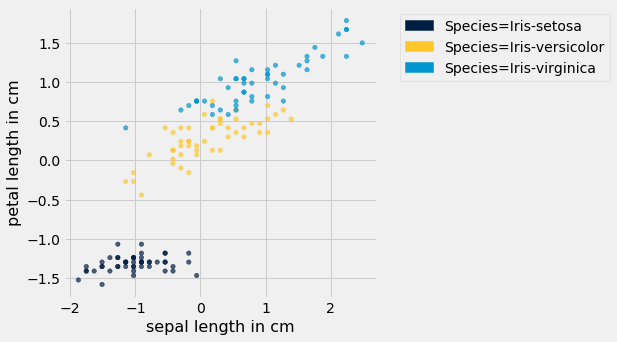

In [5]:
sepal_length_and_petal_length = data_stand.select('sepal length in cm', 'petal length in cm', 'Species')
sepal_length_and_petal_length
sepal_length_and_petal_length.scatter('sepal length in cm', 'petal length in cm', group= 'Species')

# Classification
## Steps to Classification - Iris Setosa

**1. First we ran the steps of Classification to distinguish between Iris-Setosa and the other two Species.**  
The first step was to create a function that made the column 'Species' into Boolean class values with a 1 indicating Iris Setosa and a 0 indicating not Iris Setosa.

In [6]:

def classify_iris(value):
    if value == 'Iris-setosa':
        return 1
    else:
        return 0
    
classified_iris = sepal_length_and_petal_length.apply(classify_iris, 'Species')
new_iris = sepal_length_and_petal_length.with_column('Class', classified_iris)
new_iris


sepal length in cm,petal length in cm,Species,Class
-1.14836,-1.35396,Iris-setosa,1
-1.39054,-1.41099,Iris-setosa,1
-1.51164,-1.29694,Iris-setosa,1
-1.02726,-1.35396,Iris-setosa,1
-0.542889,-1.1829,Iris-setosa,1
-1.51164,-1.35396,Iris-setosa,1
-1.02726,-1.29694,Iris-setosa,1
-1.75382,-1.35396,Iris-setosa,1
-1.14836,-1.29694,Iris-setosa,1
-0.542889,-1.29694,Iris-setosa,1


**2. Next we dropped Species in order to meet the requirements for the classify_table functions.**

In [7]:
class_iris = new_iris.drop('Species')
class_iris

sepal length in cm,petal length in cm,Class
-1.14836,-1.35396,1
-1.39054,-1.41099,1
-1.51164,-1.29694,1
-1.02726,-1.35396,1
-0.542889,-1.1829,1
-1.51164,-1.35396,1
-1.02726,-1.29694,1
-1.75382,-1.35396,1
-1.14836,-1.29694,1
-0.542889,-1.29694,1


**3. Next we outlined the decision boundary.**

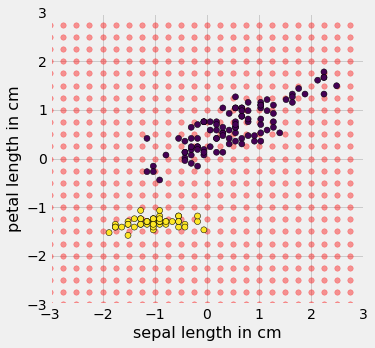

In [8]:
x_array, y_array = make_grid(-3, 3, .25)
test_grid = Table().with_columns('sepal length in cm', x_array, 'petal length in cm', y_array)
test_grid.scatter('sepal length in cm', 'petal length in cm', color='red', alpha=0.4, s=30)
plt.scatter(class_iris.column('sepal length in cm',), 
            class_iris.column('petal length in cm'), c=class_iris.column('Class'), edgecolor='k')
plt.xlim(-3, 3)
plt.ylim(-3, 3);



**4. Then we ran classify table function in order to classify all points in the decision grid using nearest neighbors.**

In [9]:
labeled_grid = classify_table(class_iris, test_grid, 1)

(-3, 3)

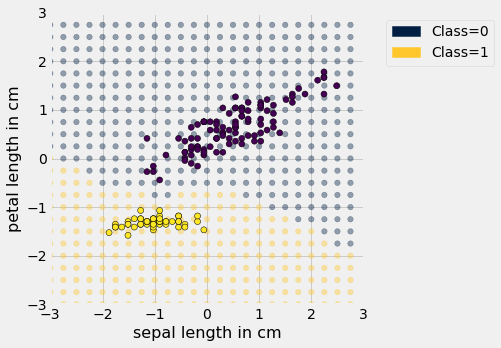

In [10]:
labeled_grid.scatter('sepal length in cm', 'petal length in cm', group='Class', alpha=0.4, s=30)

plt.scatter(class_iris.column('sepal length in cm'), class_iris.column('petal length in cm'), c=class_iris.column('Class'), edgecolor='k')

plt.xlim(-3,3)
plt.ylim(-3,3)

## Training and Testing


**5. First we shuffled our data, so that it was no longer in order. Then we split our data 2/3rds to 1/3rd in order to run the predictions and accuracy tests.**

In [11]:
shuffled_iris = class_iris.sample(with_replacement = False)
iris_training = shuffled_iris.take(np.arange(100))
iris_testing = shuffled_iris.take(np.arange(100,149))

In [12]:
def accuracy(predictions, labels):
    # Suggested code structure
    diff = labels - predictions
    num_incorrect = np.count_nonzero(diff)
    num_correct = len(labels) - num_incorrect
    accuracy = num_correct / len(labels)
    return accuracy


## Classifying Iris Setosa


**6. We use the accuracy function to evaluate different sizes of the neighboorhhood for evaluation in KNN. To do this, we first ran the following code which gives the arrays of predictions for each value of k stored in a list.**

In [13]:
predictions_1 = classify_table(iris_training, iris_testing.drop('Class'), 1).column('Class')
predictions_3 = classify_table(iris_training, iris_testing.drop('Class'), 3).column('Class')
predictions_5 = classify_table(iris_training, iris_testing.drop('Class'), 5).column('Class')
predictions_7 = classify_table(iris_training, iris_testing.drop('Class'), 7).column('Class')

In [14]:
accuracy_1 = accuracy(predictions_1, iris_testing.column('Class'))
accuracy_3 = accuracy(predictions_3, iris_testing.column('Class'))
accuracy_5 = accuracy(predictions_5, iris_testing.column('Class'))
accuracy_7 = accuracy(predictions_7, iris_testing.column('Class'))

In [15]:
print(accuracy_1)
print(accuracy_3)
print(accuracy_5)
print(accuracy_7)

1.0
1.0
1.0
1.0


**7. We reported 100% accuracy for every k value.**

## Steps to Classification - Iris Virginica 

In this Section we chose to Classifiy between the other two species without Iris Setosa based on the steps given above. We chose to do this so that for any Sepal Length and Petal Length given, we could determine which of the three classes a flower belonged to.

In [16]:
no_setosa = sepal_length_and_petal_length.where('Species', are.not_equal_to('Iris-setosa'))
no_setosa

sepal length in cm,petal length in cm,Species
1.39461,0.527732,Iris-versicolor
0.668045,0.41369,Iris-versicolor
1.27351,0.641775,Iris-versicolor
-0.421795,0.128585,Iris-versicolor
0.789139,0.470711,Iris-versicolor
-0.179608,0.41369,Iris-versicolor
0.546952,0.527732,Iris-versicolor
-1.14836,-0.270563,Iris-versicolor
0.910232,0.470711,Iris-versicolor
-0.785075,0.0715634,Iris-versicolor


In [17]:
def classify_iris_virginica(value):
    if value == 'Iris-virginica':
        return 1
    else:
        return 0
    
classified_iris_virginica = no_setosa.apply(classify_iris_virginica, 'Species')
class_iris_virginica = no_setosa.with_column('Class', classified_iris_virginica).drop('Species')
class_iris_virginica 

sepal length in cm,petal length in cm,Class
1.39461,0.527732,0
0.668045,0.41369,0
1.27351,0.641775,0
-0.421795,0.128585,0
0.789139,0.470711,0
-0.179608,0.41369,0
0.546952,0.527732,0
-1.14836,-0.270563,0
0.910232,0.470711,0
-0.785075,0.0715634,0


In [ ]:
x_array, y_array = make_grid(-3, 3, .25)
test_grid = Table().with_columns('sepal length in cm', x_array, 'petal length in cm', y_array)
test_grid.scatter('sepal length in cm', 'petal length in cm', color='red', alpha=0.4, s=30)
plt.scatter(class_iris_virginica .column('sepal length in cm',), 
            class_iris_virginica .column('petal length in cm'), c=class_iris_virginica .column('Class'), edgecolor='k')
plt.xlim(-2, 3)
plt.ylim(-2, 3);

In [ ]:
labeled_grid = classify_table(class_iris_virginica, test_grid, 1)

In [ ]:
labeled_grid.scatter('sepal length in cm', 'petal length in cm', group='Class', alpha=0.4, s=30)

plt.scatter(class_iris_virginica.column('sepal length in cm'), class_iris_virginica.column('petal length in cm'), c=class_iris_virginica.column('Class'), edgecolor='k')

plt.xlim(-2,3)
plt.ylim(-2,3)

In [ ]:
shuffled_iris_virginica = class_iris_virginica.sample(with_replacement = False)
iris_training_virginica = shuffled_iris_virginica.take(np.arange(75))
iris_testing_virginica = shuffled_iris_virginica.take(np.arange(75,100))

In [ ]:
predictions_1_virginica = classify_table(iris_training_virginica, iris_testing_virginica.drop('Class'), 1).column('Class')
predictions_3_virginica = classify_table(iris_training_virginica, iris_testing_virginica.drop('Class'), 3).column('Class')
predictions_5_virginica = classify_table(iris_training_virginica, iris_testing_virginica.drop('Class'), 5).column('Class')
predictions_7_virginica = classify_table(iris_training_virginica, iris_testing_virginica.drop('Class'), 7).column('Class')

In [ ]:
accuracy_1_virginica = accuracy(predictions_1_virginica, iris_testing_virginica.column('Class'))
accuracy_3_virginica = accuracy(predictions_3_virginica, iris_testing_virginica.column('Class'))
accuracy_5_virginica = accuracy(predictions_5_virginica, iris_testing_virginica.column('Class'))
accuracy_7_virginica = accuracy(predictions_7_virginica, iris_testing_virginica.column('Class'))

In [ ]:
print(accuracy_1_virginica)
print(accuracy_3_virginica)
print(accuracy_5_virginica)
print(accuracy_7_virginica)

# Analysis, Results and Interpretation

Our analysis focused on the two aspects of an Iris-flower: Petal Length and Sepal Length. We used these two Variables to Classify species of the Iris-flower.   
   Firstly, we classified whether or not the flower was Iris-Setosa. We standardized the data in order to create a uniform scale. Next, we wrote a function to denote Iris-Setosa by class ‘1’ and the other two Species as class ‘0’. We then ran a function to classify all of the points in our Table as either class ‘1’ or class ‘0’ and plotted the points (code shown above).  
    The graph shows two very distinct sections, with Class 1(Iris-Setosa) in yellow towards the bottom left of the quadrant and Class 0(Iris-Virginica and Iris-Versicolor) towards the top/middle of the quadrant. These distinctions indicate that Iris-Setosa flowers have sepal lengths ranging from (-2,0) and petal lengths ranging from (-.1,-1.5). Our accuracy predictions, even with an increasing level of k’s, are 1.0 for each value, meaning that our Classification Model was 100% accurate.   
    Next we wanted to Classify between the other two Species: Iris-Virginica and Iris-Versicolor. We removed Iris-Setosa from our data and chose to Classify the remaining data as ‘1’ for Iris-Virginica and ‘0’ for Iris-Versicolor. This model had the same steps as the Classification shown above.Our results indicate that these two Species were harder to distinguish between. Iris-Virginica and Iris-Versicolor have very similar boundaries for Sepal Lengths in centimeters: (-1.3, 1.5) for Iris-Versicolor and a boundary of (-1.3,2.3) for Iris-Virginica. The biggest difference pertains to the Petal Length in centimeters, where Iris-Versicolor ranges from (-.5,.8) and Iris-Virginica ranges from (.5,1.8). Our accuracy predictions, even with an increasing level of k’s, seem to vary between .88 - .96 for each value, meaning that our Classification Model was 88-96% accurate.   
    Our results aren’t controversial: this data set has been praised for its simplicity in Classification. This data doesn’t seem to have any ethical issues because it deals with classifying flowers and the data was collected in a sustainable fashion. 


# Conclusions and Future Work 

Based on our use of classification using Nearest Neighbors on the iris dataset, we were able to predict with some accuracy which of the three species of iris a flower would be based solely on said iris’ sepal and petal lengths. Our primary conclusions were just this, that given sepal and petal length we could determine which class of flower an iris belongs to. The methodology used applies to boolean classifications so we therefore needed to run two separate classifications in order to be able to distinguish between the three classes. The clear separation between the species Iris setosa from the other two species, Iris virginica and Iris versicolor, made the decision to first run classification for iris setosa fairly straightforward. After accurately distinguishing iris-setosa from the dataset we were able to classify between the other two species along the same parameters of sepal and petal length. This process helps support our other goal of learning the intricacies of classification through a more straightforward dataset. In terms of future work on this dataset we would recommend researchers to run classification on multiple dimensions so as to be able to take into account more variables and be able to classify with higher accuracy, specifically between iris versicolor and iris virginica. While we trust our results in distinguishing iris setosa from the other two classes, we believe that further classification could be helpful in increasing the accuracy when differentiating between the other two classes. 